<a href="https://colab.research.google.com/github/VageeshaDatta/Artificial_Intelligence/blob/main/Capstone_static_hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install tflearn

     |████████████████████████████████| 107 kB 27.8 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=511e3eec74ea34b519848b6c43dd577a8bb11fa4d7d4ff462553d193fcb57771
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression
from sklearn.utils import shuffle



Instructions for updating:
non-resource variables are not supported in the long term


## Classes in dataset

####   Gesture            Class      Ground Truth      Training Samples      Test Samples
#### 1)   Fist               1     [1, 0, 0, 0, 0, 0]       1000                  100
#### 2)  Number Five         2     [0, 1, 0, 0, 0, 0]       1000                  100
#### 3)  Number Six          3     [0, 0, 1, 0, 0, 0]       1000                  100
#### 4)   Ok                 4     [0, 0, 0, 1, 0, 0]       1000                  100
#### 5)  Well done           5     [1, 0, 0, 0, 1, 0]       1000                  100
#### 6)  Dissapproved        6     [1, 0, 0, 0, 0, 1]       1000                  100

In [8]:
CombinedImages = []

In [9]:
 #Combining images of all the shapes
for i in range(1,1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Fist/Fist_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
#Load Images From Palm
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Measure/Measure_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
#
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num0/Num0_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num1/Num1_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))       

for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num2/Num2_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num3/Num3_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num4/Num4_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num5/Num5_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num6/Num6_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num7/Num7_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num8/Num8_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Num9/Num9_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1)) 
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Ok/Ok_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))  
    
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Welldone/Welldone_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1)) 
    
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Disapproved/Disapproved_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))
    
for i in range(1, 1001):
    image = cv2.imread('/content/drive/MyDrive/StaticDataset/Walk/Walk_' + str(i) + '.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    CombinedImages.append(gray_image.reshape(215, 240, 1))    

In [10]:
CombinedImages[0].shape

(215, 240, 1)

TypeError: ignored

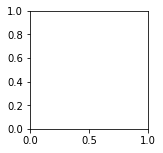

In [6]:
fig = plt.figure(figsize=(10, 10))
rows = 4
columns = 4

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(CombinedImages[0], cmap="gray")
plt.axis('off')
plt.title("Fist")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(CombinedImages[1000], cmap="gray")
plt.axis('off')
plt.title("Measure")


fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(CombinedImages[2000], cmap="gray")
plt.axis('off')
plt.title("Number 0")

fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(CombinedImages[3000], cmap="gray")
plt.axis('off')
plt.title("Number 1")

fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(CombinedImages[4000], cmap="gray")
plt.axis('off')
plt.title("Number 2")

fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(CombinedImages[5000], cmap="gray")
plt.axis('off')
plt.title("Number 3")

fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(CombinedImages[6000], cmap="gray")
plt.axis('off')
plt.title("Number 4")

fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(CombinedImages[7000], cmap="gray")
plt.axis('off')
plt.title("Number 5")


fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(CombinedImages[8000], cmap="gray")
plt.axis('off')
plt.title("Number 6")


fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(CombinedImages[9000], cmap="gray")
plt.axis('off')
plt.title("Number 7")

fig.add_subplot(rows, columns, 11)
  
# showing image
plt.imshow(CombinedImages[10000], cmap="gray")
plt.axis('off')
plt.title("Number 8")

fig.add_subplot(rows, columns, 12)
  
# showing image
plt.imshow(CombinedImages[11000], cmap="gray")
plt.axis('off')
plt.title("Number 9")

fig.add_subplot(rows, columns, 13)
  
# showing image
plt.imshow(CombinedImages[12000], cmap="gray")
plt.axis('off')
plt.title("Ok")

fig.add_subplot(rows, columns, 14)
  
# showing image
plt.imshow(CombinedImages[13000], cmap="gray")
plt.axis('off')
plt.title("Welldone")

fig.add_subplot(rows, columns, 15)
  
# showing image
plt.imshow(CombinedImages[14000], cmap="gray")
plt.axis('off')
plt.title("Dissaproved")

fig.add_subplot(rows, columns, 16)
  
# showing image
plt.imshow(CombinedImages[15000], cmap="gray")
plt.axis('off')
plt.title("Walk")


plt.show()

In [11]:
output = []

In [12]:
for i in range(1, 1001):
    output.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(1, 1001):
    output.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(1, 1001):
    output.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])  
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
    
for i in range(1, 1001):
    output.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])    
    
        

## Creating a CNN Model

In [13]:
batch_size = 50
img_height = 215
img_width = 240
num_classes=16

In [14]:
Newmodel = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dropout(0.75),  
  layers.Dense(num_classes, activation="softmax")
])

In [15]:
Newmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 215, 240, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 215, 240, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 120, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 120, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 60, 64)        1

In [16]:
Newmodel.compile(optimizer='adam',   
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CombinedImages, output, test_size=0.40, random_state=42)

In [18]:
epochs=5
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
k = np.argmax(y_train,axis=1).reshape(9600,1)
p = np.argmax(y_test,axis=1).reshape(6400,1)



In [19]:
history = Newmodel.fit(X_train,k,
        validation_data =(X_test, p),
        epochs=epochs
        )
Newmodel.save('Newmodel.h5')

Train on 9600 samples, validate on 6400 samples
Epoch 1/5
9568/9600 [============================>.] - ETA: 0s - loss: 0.1073 - acc: 0.9712

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


9600/9600 [==============================] - 26s 3ms/sample - loss: 0.1070 - acc: 0.9712 - val_loss: 0.0015 - val_acc: 0.9991
Epoch 2/5
9600/9600 [==============================] - 14s 1ms/sample - loss: 0.0061 - acc: 0.9981 - val_loss: 8.4669e-04 - val_acc: 0.9997
Epoch 3/5
9600/9600 [==============================] - 14s 1ms/sample - loss: 0.0076 - acc: 0.9975 - val_loss: 2.9473e-05 - val_acc: 1.0000
Epoch 4/5
9600/9600 [==============================] - 14s 1ms/sample - loss: 0.0070 - acc: 0.9981 - val_loss: 1.1719e-04 - val_acc: 1.0000
Epoch 5/5
9600/9600 [==============================] - 14s 1ms/sample - loss: 7.9833e-04 - acc: 0.9999 - val_loss: 4.8683e-07 - val_acc: 1.0000


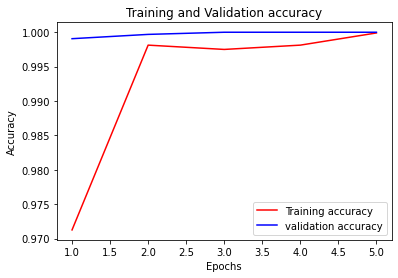

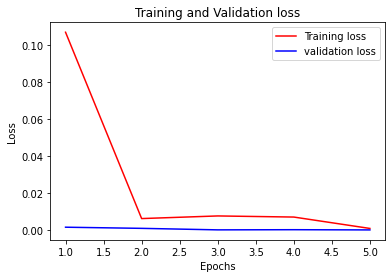

In [20]:

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

Testing_model = load_model('Newmodel.h5')
Testing_model.summary()

loss, acc= Testing_model.evaluate(X_test, p)
print("Saved model accuracy is: {:5.2f}%".format(100*acc))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 215, 240, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 215, 240, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 120, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 120, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 60, 64)        1

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Saved model accuracy is: 100.00%


In [ ]:
tf.compat.v1.reset_default_graph()
convnet=input_data(shape=[None,215,240,1],name='input')
convnet=conv_2d(convnet,32,2,activation='relu')
convnet=max_pool_2d(convnet,2)
convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,256,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,256,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=fully_connected(convnet,1000,activation='relu')
convnet=dropout(convnet,0.75)

convnet=fully_connected(convnet,16,activation='softmax')

convnet=regression(convnet,optimizer='adam',learning_rate=0.001,loss='categorical_crossentropy',name='regression')

model=tflearn.DNN(convnet,tensorboard_verbose=0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CombinedImages, output, test_size=0.30, random_state=1)

In [ ]:
len(X_train)

11200

In [ ]:
from google.colab import files

uploaded = files.upload()



Saving Ok_0.png to Ok_0.png


In [ ]:
#CombinedImages, output = shuffle(CombinedImages, output, random_state=1)

h = model.fit(X_train, y_train, n_epoch=3, 
              validation_set = (X_test, y_test),
           snapshot_step=100, show_metric=True, run_id='convnet_coursera')

model.save("/content/drive/MyDrive/StaticDataset/StaticGestureModel/GestureRecogModel.tfl")
validated = model.save("trainedmodel.h5")

Training Step: 2140  | total loss: 0.04970 | time: 27.156s
| Adam | epoch: 014 | loss: 0.04970 - acc: 0.9953 -- iter: 11136/11200
Training Step: 2141  | total loss: 0.04473 | time: 30.579s
| Adam | epoch: 014 | loss: 0.04473 - acc: 0.9958 | val_loss: 0.00041 - val_acc: 1.0000 -- iter: 11200/11200
--
INFO:tensorflow:/content/drive/MyDrive/StaticDataset/StaticGestureModel/GestureRecogModel.tfl is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:/content/trainedmodel.h5 is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
def getPredictedClass():
    # Predict
    image = cv2.imread('Ok_0.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    prediction = model.predict([gray_image.reshape(215, 240, 1)])
    return prediction

predictedClass = getPredictedClass()



In [ ]:
print(predictedClass>=0.3 and predictedClass<=0.4 )

ValueError: ignored

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

Testing_model = model.load("/content/drive/MyDrive/StaticGestureModel/GestureRecogModel.tfl")

Testing_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('Ok_0.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
final_img = gray_image.reshape(215, 240, 1)

classes = Testing_model.predict_classes(img)

print(classes)

ValueError: ignored

In [ ]:
StaticGestureModel

NameError: ignored